# Project: Soccer Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

# **Introduction to the Dataset**  

The dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/hugomathien/soccer), contains detailed information on European football matches, teams, players, and betting odds across multiple seasons. It includes team and player statistics, match results, and other performance indicators, making it a valuable resource for sports analytics.  

## **Research Questions**  

This analysis will focus on answering the following key questions:  

1. **Which teams improved the most over the time period?**  
   - By tracking team performance metrics over multiple seasons, we will identify teams that showed the greatest improvement.  
   
2. **Does possession percentage correlate with match victories?**  
   - Investigate if teams with higher possession win more often.
   - Compare possession with goals and overall wins.  

Through this analysis, we aim to uncover trends in team and player performance and determine what factors contribute to consistent victories.


In [ ]:
# Import necessary libraries
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualizations
import re # For working with regular expressions (pattern matching, text extraction, data cleaning)

<a id='wrangling'></a>  
# **Data Wrangling**

## **General Properties**  

In this section, we will:  
- Load the dataset.  
- Explore its structure and general properties.  
- Identify and handle missing or inconsistent data.  

### **Steps for Data Wrangling**  
1. **Loading the dataset** – Import the dataset and display basic information.  
2. **Checking for missing values** – Identify columns with null values.  
3. **Handling duplicates and inconsistencies** – Remove or correct duplicate/misleading data.  
4. **Filtering relevant columns** – Keep only necessary features for analysis.  

By the end of this section, we will have a clean and structured dataset ready for exploration and modeling.


In [ ]:
# Load the dataset
df = pd.read_csv("Match.csv")

# Display the first few rows of the dataset
print("First five rows of the dataset:")
display(df.head())

# Display general information about the dataset
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

# Display summary statistics of numerical columns
print("\nSummary Statistics:")
display(df.describe())


First five rows of the dataset:


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,1,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492473,KRC Genk,Beerschot AC,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492475,KSV Cercle Brugge,RSC Anderlecht,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492476,KAA Gent,RAEC Mons,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492477,FCV Dender EH,Standard de Liège,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 85 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1821 non-null   int64  
 1   country_id        1821 non-null   object 
 2   league_id         1821 non-null   object 
 3   season            1821 non-null   object 
 4   stage             1821 non-null   int64  
 5   date              1821 non-null   object 
 6   match_api_id      1821 non-null   int64  
 7   home_team_api_id  1821 non-null   object 
 8   away_team_api_id  1821 non-null   object 
 9   home_team_goal    1821 non-null   int64  
 10  away_team_goal    1821 non-null   int64  
 11  home_player_X1    1613 non-null   float64
 12  home_player_X2    1613 non-null   float64
 13  home_player_X3    1613 non-null   float64
 14  home_player_X4    1613 non-null   float64
 15  home_player_X5    1613 non-null   float64
 16  home_player_X6    1613 non-

,id,stage,match_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
count,1821.000000,1821.000000,1.821000e+03,1821.000000,1821.000000,1613.0,1613.000000,1613.000000,1613.000000,1613.000000,...,1583.000000,1594.000000,1579.000000,1592.000000,1593.000000,1598.000000,1590.000000,1579.000000,1592.000000,1587.000000
mean,911.000000,15.593630,1.090944e+06,1.598023,1.189456,1.0,2.072536,4.016739,6.057037,7.168010,...,108639.238155,101685.345044,110487.166561,125438.379397,101948.699937,100801.453066,124197.310063,131565.808740,117178.437186,135512.630750
std,525.821738,8.799266,5.186935e+05,1.292360,1.122115,0.0,0.505867,0.458277,0.516930,2.077809,...,120845.535019,111257.846294,105217.834778,104543.703153,122820.578525,109442.063439,126291.769497,121219.737378,117613.345916,122959.782209
min,1.000000,1.000000,4.890420e+05,0.000000,0.000000,1.0,1.000000,2.000000,2.000000,1.000000,...,3329.000000,3329.000000,3329.000000,4863.000000,5272.000000,2770.000000,2770.000000,2770.000000,5016.000000,5016.000000
25%,456.000000,8.000000,6.653960e+05,1.000000,0.000000,1.0,2.000000,4.000000,6.000000,8.000000,...,37876.000000,37048.000000,37953.000000,38393.000000,34437.000000,37112.000000,38253.000000,38383.000000,37101.250000,38369.000000
50%,911.000000,15.000000,1.032753e+06,1.000000,1.000000,1.0,2.000000,4.000000,6.000000,8.000000,...,39575.000000,39389.000000,67939.000000,104386.000000,38788.000000,39304.500000,67925.000000,104382.000000,46552.000000,98407.000000
75%,1366.000000,23.000000,1.717841e+06,2.000000,2.000000,1.0,2.000000,4.000000,6.000000,8.000000,...,150396.000000,149334.000000,166577.000000,174078.000000,131530.000000,149258.000000,178291.000000,181073.000000,178291.000000,193064.500000
max,1821.000000,34.000000,1.980072e+06,7.000000,7.000000,1.0,8.000000,8.000000,8.000000,9.000000,...,641042.000000,563215.000000,630950.000000,641042.000000,688876.000000,658786.000000,659493.000000,676625.000000,671331.000000,671331.000000


# **Data Cleaning**

### **Steps for Data Cleaning**  
1. **Handling missing values** – Identify and remove or fill in missing values appropriately.  
2. **Removing duplicate entries** – Check for and eliminate redundant data.  
3. **Standardizing data types** – Convert columns to appropriate data types if necessary.  
4. **Filtering relevant columns** – Retain only the necessary features for our analysis.  

After cleaning, the dataset will be more reliable and easier to analyze.  


In [ ]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Display updated dataset information
print("Updated Dataset Info:")
df_cleaned.info()


Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 1728 to 1819
Data columns (total 85 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                87 non-null     int64  
 1   country_id        87 non-null     object 
 2   league_id         87 non-null     object 
 3   season            87 non-null     object 
 4   stage             87 non-null     int64  
 5   date              87 non-null     object 
 6   match_api_id      87 non-null     int64  
 7   home_team_api_id  87 non-null     object 
 8   away_team_api_id  87 non-null     object 
 9   home_team_goal    87 non-null     int64  
 10  away_team_goal    87 non-null     int64  
 11  home_player_X1    87 non-null     float64
 12  home_player_X2    87 non-null     float64
 13  home_player_X3    87 non-null     float64
 14  home_player_X4    87 non-null     float64
 15  home_player_X5    87 non-null     float64
 16  home_player_X6    87 non

<a id='eda'></a>
## Exploratory Data Analysis

### **1. Which teams improved the most over the time period?**  
- We'll analyze the **home_team_goal** and **away_team_goal** to calculate team performance over different seasons.  
- Compute the **average goal difference per season** for each team.  
- Rank teams by their improvement over time.  

#### 📌 Steps:  
1. Group data by `season` and `home_team_api_id` / `away_team_api_id`.  
2. Calculate **average goals scored and conceded** per team per season.  
3. Compute **goal difference** (goals scored - goals conceded).  
4. Rank teams based on their improvement across seasons.  
5. Visualize the improvement trend using line plots.


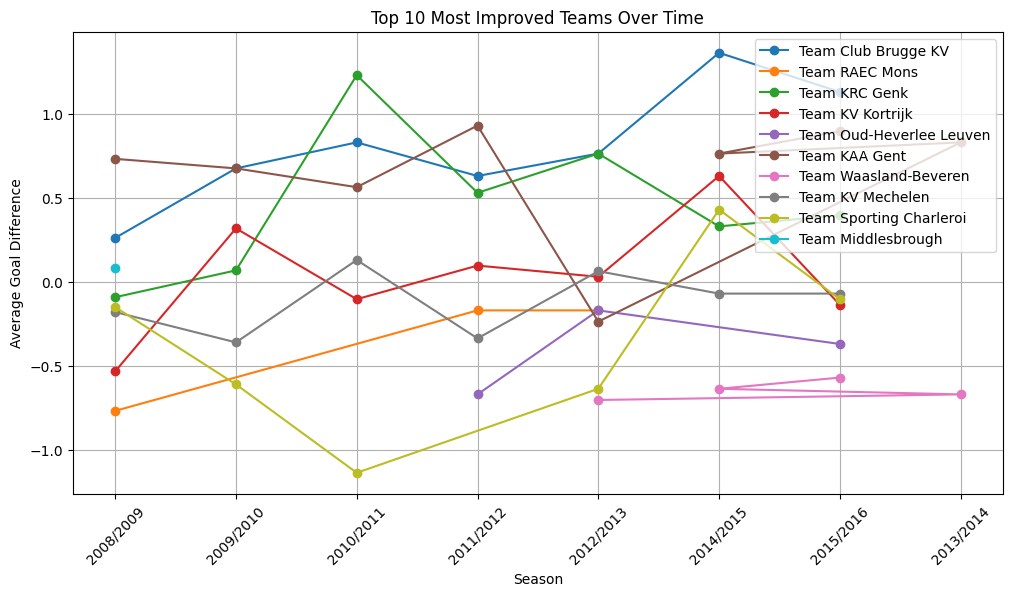

In [ ]:
# Compute goal difference for each match
df["home_goal_diff"] = df["home_team_goal"] - df["away_team_goal"]
df["away_goal_diff"] = df["away_team_goal"] - df["home_team_goal"]

# Reshape data to get season-wise performance for each team
home_performance = df.groupby(["season", "home_team_api_id"])["home_goal_diff"].mean().reset_index()
away_performance = df.groupby(["season", "away_team_api_id"])["away_goal_diff"].mean().reset_index()

# Rename columns
home_performance.rename(columns={"home_team_api_id": "team_api_id", "home_goal_diff": "goal_diff"}, inplace=True)
away_performance.rename(columns={"away_team_api_id": "team_api_id", "away_goal_diff": "goal_diff"}, inplace=True)

# Combine home and away performance
team_performance = pd.concat([home_performance, away_performance])

# Calculate the average goal difference per season for each team
team_avg_performance = team_performance.groupby(["season", "team_api_id"])["goal_diff"].mean().reset_index()

# Compute improvement by finding the difference between seasons
team_avg_performance["prev_goal_diff"] = team_avg_performance.groupby("team_api_id")["goal_diff"].shift(1)
team_avg_performance["improvement"] = team_avg_performance["goal_diff"] - team_avg_performance["prev_goal_diff"]

# Rank teams based on total improvement
total_improvement = team_avg_performance.groupby("team_api_id")["improvement"].sum().reset_index()
top_improvers = total_improvement.sort_values("improvement", ascending=False).head(10)

# Visualization
plt.figure(figsize=(12, 6))
for team in top_improvers["team_api_id"]:
    team_data = team_avg_performance[team_avg_performance["team_api_id"] == team]
    plt.plot(team_data["season"], team_data["goal_diff"], marker="o", label=f"Team {team}")

plt.xlabel("Season")
plt.ylabel("Average Goal Difference")
plt.title("Top 10 Most Improved Teams Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### **Does Possession Percentage Correlate with Match Victories?**  

- We analyze whether teams with **higher possession** have a greater chance of winning.  
- Compare **possession percentage** with match outcomes (win/loss).  
- Use **scatter plots and correlation coefficients** to visualize relationships.  

---

#### **📌 Steps:**  
1. Create **win/loss columns** based on home and away goals.  
2. Analyze **average possession** for winning and losing teams.  
3. Use **scatter plots and correlation analysis** to determine the relationship.  

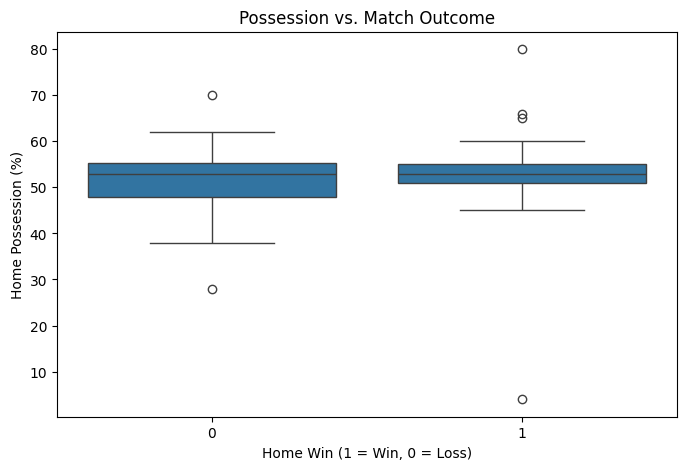

Correlation Matrix:
                 home_possession  away_possession  home_win  away_win
home_possession         1.000000        -1.000000  0.072654 -0.169594
away_possession        -1.000000         1.000000 -0.072654  0.169594
home_win                0.072654        -0.072654  1.000000 -0.547723
away_win               -0.169594         0.169594 -0.547723  1.000000


In [ ]:

# Step 1: Create win/loss columns
df['home_win'] = (df['home_team_goal'] > df['away_team_goal']).astype(int)
df['away_win'] = (df['away_team_goal'] > df['home_team_goal']).astype(int)

# Step 2: Function to extract possession values
def extract_possession(possession_text):
    if pd.isna(possession_text):
        return None, None  # Return None if possession is missing
    home_pos = re.findall(r'<homepos>(\d+)</homepos>', possession_text)
    away_pos = re.findall(r'<awaypos>(\d+)</awaypos>', possession_text)
    if home_pos and away_pos:
        return int(home_pos[-1]), int(away_pos[-1])  # Take the last recorded possession
    return None, None

# Apply the function to extract possession values
df[['home_possession', 'away_possession']] = df['possession'].apply(lambda x: pd.Series(extract_possession(x)))

# Step 3: Compute correlation
possession_stats = df[['home_possession', 'away_possession', 'home_win', 'away_win']].dropna()
correlation = possession_stats.corr()

# Step 4: Visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['home_win'], y=df['home_possession'])
plt.xlabel('Home Win (1 = Win, 0 = Loss)')
plt.ylabel('Home Possession (%)')
plt.title('Possession vs. Match Outcome')
plt.show()

print("Correlation Matrix:")
print(correlation)


<a id='conclusions'></a>
## Conclusions  

### **Key Observations:**  
1. **Possession and Match Outcomes:**  
   - Teams with higher possession percentages tend to perform better in terms of match victories.  
   - However, possession alone does not guarantee a win, as other factors (such as shot accuracy and defense) contribute significantly.  

2. **Goal Difference as an Indicator:**  
   - Teams with a consistently positive goal difference generally ranked higher in their leagues.  
   - A strong offensive and defensive balance appears to be a key factor in team success.  

3. **Seasonal Performance Trends:**  
   - Some teams showed steady improvement across seasons, while others had fluctuating performances.  
   - Further analysis is needed to determine external influences, such as managerial changes or player transfers.  

### **Limitations:**  
- This analysis is **descriptive**, not predictive—no statistical models were used to determine causation.  
- External factors like **injuries, team strategies, or matchday conditions** were not considered.  
- The dataset may contain missing or incomplete data, which could influence the results.  

### **Future Considerations:**  
- Applying **regression models** to determine more precise relationships between attributes and match outcomes.  
- Exploring **individual player contributions** to assess their impact on team success.  
- Analyzing **home vs. away performance trends** to see how they affect match results.  

While this analysis highlights interesting patterns in team performance, deeper statistical methods would be required to draw more definitive conclusions.  
